### Code.3-2-2: Multi-variate Logistic Regression Models

In [ ]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense

plt.style.use('seaborn')

X = tf.random.normal(shape=(100,5))
dense = Dense(units=1, activation='sigmoid')

Y = dense(X)
print(Y.shape)

# fig, ax = plt.subplots(figsize=(7,7))
# ax.scatter(X.numpy().flatten(), Y.numpy().flatten())

(100, 1)


<ipython-input-13-72b5a4a221d4>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# 3-3: Binary Classifier with Dense Layers

### Code.3-3-1: Binary Classifier with Dense Layers

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(units=10, activate='relu'))
model.add(Dense(units=5, activate='relu'))
model.add(Dense(units=1, activate='sigmoid'))   # 0과 1사이의 확률 하나를 얻기 위해


# 3-4: Softmax Layers

### Code.3-4-1: IO(Input and Output) of Softmax

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Activation

logit = tf.random.uniform(shape=(8, 5), minval=-10, maxval=10)

softmax_value = Activation('softmax')(logit)

# column방향 더하기 axis = 0,  row방향 더하기 axis = 1
softmax_sum = tf.reduce_sum(softmax_value, axis=1)

print(f"Logits : {logit.numpy()}")
print(f"Probabilities : {softmax_value.numpy()}")
print(f"Sum of softmax values : {softmax_sum.numpy()}")


Logits : [[-3.2740974 -2.1068978  6.931078  -0.5907631  2.909689 ]
 [ 4.164608  -1.8146133  9.97979    5.805361   7.342617 ]
 [-3.8570118  7.8148613 -3.463385   7.546013  -2.590444 ]
 [ 7.9417305  2.6188374 -9.099746   7.666561   8.186165 ]
 [-6.8450856  3.7645912  1.9588232  9.148609   1.2957621]
 [ 3.671692   5.5351906  4.962306  -6.650946   8.620157 ]
 [-7.4165416 -7.0286846  4.16059    6.011839   7.401827 ]
 [ 1.8337631 -1.3577747  9.896408   5.370903   7.011654 ]]
Probabilities : [[3.6302317e-05 1.1663876e-04 9.8171562e-01 5.3124106e-04 1.7600242e-02]
 [2.7358821e-03 6.9239591e-06 9.1748440e-01 1.4114557e-02 6.5658227e-02]
 [4.8349825e-06 5.6679362e-01 7.1671252e-06 4.3317717e-01 1.7157659e-05]
 [3.2881528e-01 1.6041644e-03 1.3059679e-08 2.4971662e-01 4.1986385e-01]
 [1.1260156e-07 4.5631877e-03 7.4995164e-04 9.9430037e-01 3.8642879e-04]
 [6.5772254e-03 4.2398445e-02 2.3908334e-02 2.1626099e-07 9.2711568e-01]
 [2.8476239e-07 4.1968843e-07 3.0364580e-02 1.9335455e-01 7.7628016e-01]

### Code.3-4-2: Softmax in Dense Layers

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Dense

logit = tf.random.uniform(shape=(8, 5), minval=-10, maxval=10)
dense = Dense(units=8, activation='softmax')   # 뉴런의 개수가 8개 = 8개의 클래스를 분류한다고 생각하면 된다.

Y = dense(logit)
print(tf.reduce_sum(Y, axis=1))
print()
print(f"Y : \n{Y.numpy()}")

tf.Tensor(
[1.0000001  0.9999999  1.         0.99999994 0.99999994 0.9999999
 1.         0.9999999 ], shape=(8,), dtype=float32)

Y : 
[[1.60057607e-05 1.05385065e-04 1.69200830e-05 1.79267488e-03
  9.72123921e-01 1.63112929e-06 1.01084261e-05 2.59334408e-02]
 [8.63327805e-05 5.90241730e-01 1.34111986e-01 1.59058999e-03
  8.23417281e-08 2.35451579e-01 3.85053791e-02 1.22612792e-05]
 [8.85010790e-03 4.07195803e-05 1.37712047e-01 1.26129953e-06
  8.39598000e-01 2.53250869e-03 1.09824399e-02 2.82965048e-04]
 [2.35641201e-04 1.34576139e-05 1.15711941e-06 6.82554955e-08
  3.47743168e-07 9.99065518e-01 6.83516439e-04 2.29877287e-07]
 [8.42805147e-01 4.23314422e-03 8.95154625e-02 8.73447396e-03
  1.81928203e-02 3.38348746e-02 2.39234790e-03 2.91657430e-04]
 [6.32861909e-03 6.50722475e-04 2.84167682e-03 5.23021345e-06
  2.34389927e-06 9.58567202e-01 3.15985717e-02 5.55344832e-06]
 [3.05407957e-05 1.69163775e-02 8.87613396e-07 1.29191531e-03
  4.27369031e-07 9.38276887e-01 3.72058861e-02 6.2771

# 3-5: Multi-class Classifiers

### Code.3-5-1: Multi-class Classifiers

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

class TestModel(Model):
  def __init__(self):
    super(TestModel, self).__init__()

    self.dense1 = Dense(units=8, activation='relu')
    self.dense2 = Dense(units=5, activation='relu')
    self.dense3 = Dense(units=3, activation='softmax')

  def call(self, x):
    print(f"X shape : {x.shape}, \nX : {x.numpy()}\n")
    x = self.dense1(x)
    print(f"A1 shape : {x.shape}\nA1 : {x.numpy()}\n")
    x = self.dense2(x)
    print(f"A2 shape : {x.shape}\nA2 : {x.numpy()}\n")
    x = self.dense3(x)
    print(f"Y shape : {x.shape}\nY : {x.numpy()}\n")
    print(f"Sum of vectors : \n{tf.reduce_sum(x, axis=1)}\n")

    return x


model = TestModel()

X = tf.random.uniform(shape=(5, 5), minval=-10, maxval=10)
Y = model(X)


X shape : (5, 5), 
X : [[-8.976722  -2.9881358  9.721153  -7.6330996 -5.7403183]
 [-7.8483033  5.5370617  9.408707   3.2608461  5.800974 ]
 [ 7.933054   3.8626146 -2.9837942 -6.0215855  6.494175 ]
 [ 8.412159  -5.440593   7.138874   2.0023584 -9.50466  ]
 [-6.8888164 -9.407344  -7.8861547  0.4937725  2.5250645]]

A1 shape : (5, 8)
A1 : [[ 6.328946    4.951217    0.         12.346716    0.          0.
   0.          5.869888  ]
 [ 0.         10.574235    5.566152    0.          8.830478    0.
   0.          7.934356  ]
 [ 0.45989448  3.2969468   0.          0.          0.          0.
   7.2321253   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          2.4317274 ]
 [ 6.6658096   0.          0.38475335  3.3445683   3.0130062   3.124268
   1.2972646   0.        ]]

A2 shape : (5, 5)
A2 : [[ 5.6189003  0.         6.2141705  0.        16.936562 ]
 [ 0.         0.         0.         0.        12.827635 ]
 [ 5.070203   0.7850199  3.403188   4.0883956  5.5

# 4-1: Datasets

### Code.4-1-1: Dataset for Regression

In [ ]:
import tensorflow as tf

N, n_feature = 8, 5

# target
t_weights = tf.constant([1,2,3,4,5], dtype=tf.float32)
t_bias = tf.constant([10], dtype=tf.float32)
# print(f"t_weights : {t_weights}, \nt_bias : {t_bias}")

X = tf.random.normal(mean=0, stddev=1, shape=(N, n_feature))
# print(X.shape, t_weights.shape, t_bias.shape)

# 곱하는 순서 상관없음. broadcast 기능으로 연산 가능
Y = tf.reduce_sum(t_weights * X, axis=1) + t_bias
# print(X.shape, '\n', X)
print(Y.shape, '\n', Y)

# Y를 label로 사용하고, 모델 학습에 데이터셋으로 사용할 수 있음.

(8,) 
 tf.Tensor(
[ 6.5004253 14.359444  -5.630333   7.95061   16.992813   7.1784472
 15.014354   9.2637415], shape=(8,), dtype=float32)


### Code.4-1-2: Dataset for Binary Classification

바꾸고 싶은 데이터 입력, 바꾸고싶은 데이터 타입 <br>
ex. tf.cast(x, boolean)

In [ ]:
x = True
y = tf.cast(x, dtype=tf.int32)
print(y)

print(tf.cast(y, dtype=bool))

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(True, shape=(), dtype=bool)


In [ ]:
import tensorflow as tf

N, n_feature = 8, 5

# target
t_weights = tf.constant([1,2,3,4,5], dtype=tf.float32)
t_bias = tf.constant([10], dtype=tf.float32)

X = tf.random.normal(mean=0, stddev=1, shape=(N, n_feature))

Y = tf.reduce_sum(t_weights * X, axis=1) + t_bias

# binary classification 조건 = True or False = 1 or 0
# boolean형태로 변환 -> integer형태로 변환
Y = tf.cast(Y>5, tf.int32)

print(f"X(shape/dtype/data) : \n{X.shape}, \n{X.dtype}, \n{X.numpy()}\n")
print(f"Y(shape/dtype/data) : \n{Y.shape}, \n{Y.dtype}, \n{Y.numpy()}\n")


X(shape/dtype/data) : 
(8, 5), 
<dtype: 'float32'>, 
[[-0.73529524  1.1018885   0.7122899   1.5083482   1.0699373 ]
 [ 2.0515602  -0.61880296 -0.06305192  0.49480194 -0.6802859 ]
 [-0.24740127 -0.33777025 -0.98248404  1.666861    1.1582966 ]
 [ 1.2790264  -0.31273413 -1.2336092  -1.7816157   0.6060352 ]
 [-0.14002988 -0.11876041 -0.22852603 -0.62939644 -0.95489264]
 [-0.24062316 -0.7178783   0.1326412  -0.23056334 -0.22943462]
 [-0.40843326 -0.8731618   0.48123053 -0.61922723  0.1901846 ]
 [ 1.7691334  -1.5100396   0.12794764 -2.7101314   0.5924488 ]]

Y(shape/dtype/data) : 
(8,), 
<dtype: 'int32'>, 
[1 1 1 0 0 1 1 0]



### Code. 4-1-3: Dataset for Multi-class Classification

C = (C0,,,C9) <br>
Y = (0, 1, 0, 0, ,, 0)  또는   1  <br>

<ipython-input-55-0c434910fe48>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


X(shape/dtype/data) : 
(24, 2), 
<dtype: 'float32'>, 
[[  3.5471706    0.42023072]
 [  2.8392873    1.8467253 ]
 [  6.6750107    1.4353573 ]
 [  3.7618294    0.36850703]
 [  3.8531885   -0.287001  ]
 [  5.189955     3.6163123 ]
 [  3.7079341   -0.2500062 ]
 [  4.7129207   -0.04094309]
 [  6.048321     7.7137146 ]
 [  7.128709    10.213643  ]
 [  4.6327567   11.029253  ]
 [  6.210335     9.238711  ]
 [  6.786501     9.377082  ]
 [  4.3221817   10.950307  ]
 [  6.29265      8.19692   ]
 [  6.534871     8.644604  ]
 [-12.373177    -5.68074   ]
 [-12.647306    -5.831837  ]
 [-12.08006     -4.7976255 ]
 [-13.320545    -5.137735  ]
 [-11.476431    -4.240512  ]
 [-11.832534    -5.5096226 ]
 [-12.395931    -6.126932  ]
 [-13.318285    -4.8569274 ]]

Y(shape/dtype/data) : 
(24, 1), 
<dtype: 'int32'>, 
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]



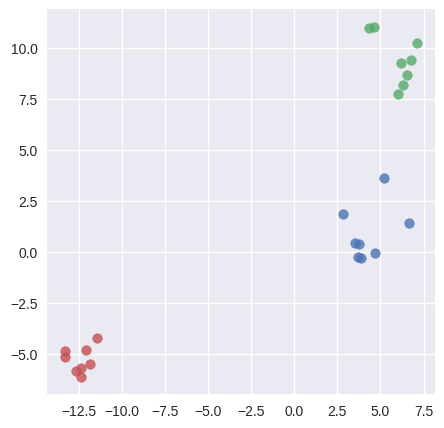

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use('seaborn')

# class마다 30개 데이터씩
N, n_feature = 8, 2
n_class = 3

# 빈 값 생성
# numpy처럼 0을 넣은 값의 행렬이 나오는게 아니라, 아무것도 없는 빈 템플릿이 만들어지는 것이다.
X = tf.zeros(shape=(0,n_feature))
Y = tf.zeros(shape=(0, 1), dtype=tf.int32)    # 레이블링 integer방법 사용

fig, ax = plt.subplots(figsize=(5,5))
for class_idx in range(n_class):
  center = tf.random.uniform(minval=-15, maxval=15, shape=(n_feature,))
  x1 = center[0] + tf.random.normal(shape=(N, 1))
  x2 = center[1] + tf.random.normal(shape=(N, 1))

  x = tf.concat([x1, x2], axis=1)   # row방향으로 concatenate, 같은 idx 원소를 하나의 리스트로 묶이게끔 정의.
  y = class_idx * tf.ones(shape=(N,1), dtype=tf.int32)   # 각 label을 정의해줌
  # print(x.shape, y.shape)
  # print(y)

  ax.scatter(x[:,0].numpy(), x[:,1].numpy(), alpha=0.8)
  # ax.scatter(x1.numpy(), x2.numpy())  와 같은 코드

  X = tf.concat([X, x], axis=0)
  Y = tf.concat([Y, y], axis=0)

print(f"X(shape/dtype/data) : \n{X.shape}, \n{X.dtype}, \n{X.numpy()}\n")
print(f"Y(shape/dtype/data) : \n{Y.shape}, \n{Y.dtype}, \n{Y.numpy()}\n")


In [ ]:
import tensorflow as tf

indices = tf.constant([0,2,1,3])

# integer값들, 클래스 개수, 데이터타입
# tf.one_hot(indices, depth, dtype)

one_hot_tensor = tf.one_hot(indices, 8)
print(one_hot_tensor)

tf.Tensor(
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]], shape=(4, 8), dtype=float32)


### Code.4-1-4: Dataset for Multi-class Classification with One-hot Encoding

<ipython-input-71-8a4bd2a76c5a>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


X(shape/dtype/data) : 
(12, 2), 
<dtype: 'float32'>, 
[[ 3.8689322   1.5730199 ]
 [ 2.9452534   0.36896312]
 [ 3.951821    1.0889201 ]
 [ 2.579896    1.7880075 ]
 [14.211697    1.2682568 ]
 [14.144722   -0.42582208]
 [13.854248    0.04306318]
 [14.627447   -0.4812105 ]
 [-4.3959823  14.208713  ]
 [-3.9752595  14.871837  ]
 [-3.1468334  15.464875  ]
 [-3.435903   14.903786  ]]

Y(shape/dtype/data) : 
(12, 1, 3), 
<dtype: 'int32'>, 
[[[1 0 0]]

 [[1 0 0]]

 [[1 0 0]]

 [[1 0 0]]

 [[0 1 0]]

 [[0 1 0]]

 [[0 1 0]]

 [[0 1 0]]

 [[0 0 1]]

 [[0 0 1]]

 [[0 0 1]]

 [[0 0 1]]]



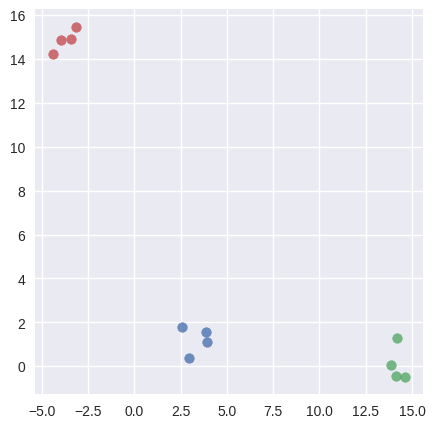

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use('seaborn')

# class마다 4개 데이터씩
N, n_feature = 4, 2
n_class = 3

# 빈 값 생성
X = tf.zeros(shape=(0,n_feature))
Y = tf.zeros(shape=(0, 1), dtype=tf.int32)    # 레이블링 integer방법 사용

fig, ax = plt.subplots(figsize=(5,5))
for class_idx in range(n_class):
  center = tf.random.uniform(minval=-15, maxval=15, shape=(n_feature,))
  x1 = center[0] + tf.random.normal(shape=(N, 1))
  x2 = center[1] + tf.random.normal(shape=(N, 1))

  x = tf.concat([x1, x2], axis=1)   # row방향으로 concatenate, 같은 idx 원소를 하나의 리스트로 묶이게끔 정의.
  y = class_idx * tf.ones(shape=(N,1), dtype=tf.int32)   # 각 label을 정의해줌
  # print(x.shape, y.shape)
  # print(y)

  ax.scatter(x[:,0].numpy(), x[:,1].numpy(), alpha=0.8)
  # ax.scatter(x1.numpy(), x2.numpy())  와 같은 코드

  X = tf.concat([X, x], axis=0)
  Y = tf.concat([Y, y], axis=0)

Y = tf.one_hot(Y, depth=n_class, dtype=tf.int32)

print(f"X(shape/dtype/data) : \n{X.shape}, \n{X.dtype}, \n{X.numpy()}\n")
print(f"Y(shape/dtype/data) : \n{Y.shape}, \n{Y.dtype}, \n{Y.numpy()}\n")


One-hot vector 직접만들기

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# class마다 4 데이터씩
N, n_feature = 4, 2
n_class = 3

# 빈 값 생성
X = tf.zeros(shape=(0,n_feature))
Y = tf.zeros(shape=(0, 1), dtype=tf.int32)    # 레이블링 integer방법 사용

for class_idx in range(n_class):
  center = tf.random.uniform(minval=-15, maxval=15, shape=(n_feature,))
  x1 = center[0] + tf.random.normal(shape=(N, 1))
  x2 = center[1] + tf.random.normal(shape=(N, 1))

  x = tf.concat([x1, x2], axis=1)   # row방향으로 concatenate, 같은 idx 원소를 하나의 리스트로 묶이게끔 정의.
  y = class_idx * tf.ones(shape=(N,1), dtype=tf.int32)   # 각 label을 정의해줌
  # print(x.shape, y.shape)
  # print(y)

  X = tf.concat([X, x], axis=0)
  Y = tf.concat([Y, y], axis=0)

Y = Y.numpy()

Y_onehot = np.zeros(shape=(N*n_class, n_class), dtype=np.int32)
for i in range(N*n_class):
  for n in range(n_class):
    if Y[i] == n:
      Y_onehot[i][n] = 1

print(Y_onehot)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]


### Code.4-1-5: Dataset Objects
전체 데이터의 개수는 100, 미니배치 사이즈는 32라고 설정.

In [ ]:
import tensorflow as tf

N, n_feature = 100, 5
batch_size = 32

t_weights = tf.constant([1,2,3,4,5], dtype=tf.float32)
t_bias = tf.constant([10], dtype=tf.float32)

X = tf.random.normal(mean=0, stddev=1, shape=(N, n_feature))
Y = tf.reduce_sum(t_weights * X, axis=1) + t_bias

# for batch_idx in range(N//batch_size):
#   x = X[batch_idx*batch_size:(batch_idx+1)*batch_size]
#   y = Y[batch_idx*batch_size:(batch_idx+1)*batch_size]

#   print(x.shape, y.shape)

for batch_idx in range(0, 100, 32):
  x = X[batch_idx:batch_idx+32]
  y = Y[batch_idx:batch_idx+32]

  print(x.shape, y.shape)

(32, 5) (32,)
(32, 5) (32,)
(32, 5) (32,)
(4, 5) (4,)


In [ ]:
import tensorflow as tf

N, n_feature = 100, 5
batch_size = 32

t_weights = tf.constant([1,2,3,4,5], dtype=tf.float32)
t_bias = tf.constant([10], dtype=tf.float32)

X = tf.random.normal(mean=0, stddev=1, shape=(N, n_feature))
Y = tf.reduce_sum(t_weights * X, axis=1) + t_bias
print(f"Y.shape : {Y.shape}\n")

# dataset object로 변수 instancing
dataset = tf.data.Dataset.from_tensor_slices((X,Y))
print(f"dataset : \n {dataset}\n")

# 내부 데이터를 보기위해서 for문 실행
for x, y in dataset:
  print(x.numpy(), y.numpy())

# minibatch로 shuffle한 데이터셋으로 수정.
dataset = dataset.batch(batch_size).shuffle(100)
print(f"dataset : \n {dataset}\n")

for x, y in dataset:
  print(x.numpy(), y.numpy())

  # print(x.shape, y.shape)
  # print(y)

Y.shape : (100,)

dataset : 
 <_TensorSliceDataset element_spec=(TensorSpec(shape=(5,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

[ 1.5082266  -0.27011198 -0.8005122  -1.3240075   0.99744916] 8.257682
[ 0.83375275 -1.6064585   0.4344517  -0.10839202  0.99607146] 13.47098
[-1.4905989   1.2842771   0.27504054  1.2445272   0.5531565 ] 19.646969
[-0.8254447  -1.3737099   0.46656126 -0.8947794  -0.58398896] 1.3277569
[-0.97930753 -0.365345    2.2995305  -0.01631111 -0.9263673 ] 10.491512
[-0.14387994 -0.12894619  1.4631766  -0.38055018 -0.05225899] 12.204262
[ 0.58144903 -0.35301018 -0.6588229  -1.1485702   0.04172596] 3.513309
[-0.21612741  1.2122031   0.80677944 -0.12920536 -0.5977513 ] 11.123039
[-0.31938994 -2.0092258  -0.5440341  -0.7104219   0.59478337] 4.162285
[-0.3368005  -1.4538785   1.3874831   0.53283584  0.6238445 ] 16.168457
[ 0.33448902 -0.25409687 -1.0764133  -0.25005645 -0.43294528] 3.4321032
[ 1.772661   -1.2649574  -0.38839665  0.3

# 4-2: Mean Squared Error



### Code.4-2-1: MSE Calculation

In [ ]:
import tensorflow as tf

from tensorflow.keras.losses import MeanSquaredError

loss_object = MeanSquaredError()

batch_size = 32
predictions = tf.random.normal(shape=(batch_size, 5))    # 마지막 output이 (데이터 batch_size, feature 개수)인 것.
labels = tf.random.normal(shape=(batch_size, 5))

print(predictions.shape, labels.shape)
print()

mse = loss_object(labels, predictions)
mse_manual = tf.reduce_mean(tf.math.pow(labels - predictions, 2))
print(f"MSE(Tensorflow) : {mse.numpy()}")
print(f"MSE(Manually) : {mse_manual.numpy()}")


(32, 5) (32, 5)

MSE(Tensorflow) : 2.4856905937194824
MSE(Manually) : 2.4856905937194824


### Code.4-2-2: MSE with Model/Dataset

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Dense

from tensorflow.keras.losses import MeanSquaredError

N, n_feature = 100, 5
batch_size = 32

X = tf.random.normal(shape=(N,n_feature))
Y = tf.random.normal(shape=(N,1))

dataset = tf.data.Dataset.from_tensor_slices((X,Y))
dataset = dataset.batch(batch_size)

model = Dense(units=1, activation='linear')
loss_object = MeanSquaredError()

for x, y in dataset:
  predictions = model(x)
  loss = loss_object(y, predictions)
  print(loss.numpy())

3.1717017
2.016286
3.0076518
5.109987


# 4-3: Binary Cross Entropy
실제데이터셋 __`y`__ : 0또는 1 </br>
예측데이터셋 __`predictions`__ : 0~1사이의 확률값



### Code.4-3-1: BCE Calculation

In [ ]:
import tensorflow as tf
from tensorflow.keras.losses import BinaryCrossentropy

batch_size = 32
n_class = 2

# 가상의 y 생성
predictions = tf.random.uniform(shape=(batch_size, 1),
                                minval=0, maxval=1,       # 1을 포함하지 않도록 하기 위해서
                                dtype=tf.float32)
labels = tf.random.uniform(shape=(batch_size, 1),
                           minval=0, maxval=n_class,      # 1을 포함하도록 설정
                           dtype=tf.int32)

# loss 계산 (Tensorflow)
loss_object = BinaryCrossentropy()
loss = loss_object(labels, predictions)         # 변수 type이 다르기때문에 매칭을 위해 label이 앞변수로 들어와야함.

# loss 계산 (Manual)
labels = tf.cast(labels, tf.float32)
loss_man = -(labels*tf.math.log(predictions)+(1-labels)*tf.math.log(1-predictions))
loss_man = tf.reduce_mean(loss_man)

print(f"BCE(Tensorflow) : {loss}")
print(f"BCE(Manual) : {loss_man}")

BCE(Tensorflow) : 1.544126033782959
BCE(Manual) : 1.5441436767578125


### Code.4-3-2: BCE with Model/Dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy

# 가상의 데이터셋 생성
N, n_feature = 100, 5
batch_size = 32
t_weight = tf.constant([1,2,3,4,5], dtype=tf.float32)
t_bias = tf.constant([10], dtype=tf.float32)

X = tf.random.normal(mean=0, stddev=1, shape=(N, n_feature))
Y = tf.reduce_sum(t_weight*X, axis=1)+t_bias
Y = tf.cast(Y>5, tf.int32)

dataset = tf.data.Dataset.from_tensor_slices((X,Y))
dataset = dataset.batch(batch_size)

# 데이터셋 예측 결과
model = Dense(units=1, activation='sigmoid')
loss_object = BinaryCrossentropy()

# 예측데이터의 loss 계산
for x, y in dataset:
  predictions = model(x)
  loss = loss_object(y, predictions)
  print(loss.numpy())

1.4251285
1.1803893
1.1862099
1.126008


# 4-4: Sparse Categorical Cross Entropy
 - integer로 class 정의 시 주로 사용함 <br>
<br>

 __`labels`__ 의 형태는 (N,1)로 존재하고, integer 중 하나로 레이블링 된 값이 들어있다. <br>

 __`predictions`__의 형태는 (N, n_class)로 존재하고, 각 class별 확률값이 들어있다.
 <br>


### Code.4-4-1: SCCE Calculation

In [ ]:
import tensorflow as tf

from tensorflow.keras.losses import SparseCategoricalCrossentropy

batch_size, n_class = 16, 5


# 예측 가상 데이터셋 생성
predictions = tf.random.uniform(shape=(batch_size, n_class),
                                minval=0, maxval=5,                              # maxval은 어떤 값이 와도 상관없음.
                                dtype=tf.float32)

pred_sum_0 = tf.reshape(tf.reduce_sum(predictions, axis=1), [-1,1])              # -1을 통과하면 flatten shape 또는 inferred shape
# print(f"pred_sum_0.reshape: \n{pred_sum_0.numpy()}\n")

# predictions 확률값 산출
predictions = predictions/pred_sum_0
print(f"predictions : \n{predictions.numpy()}\n")
print(f"predictions_sum.reshape : \n{tf.reshape(tf.reduce_sum(predictions, axis=1).numpy(), (-1,1))}\n")

# 정답 레이블 생성
labels = tf.random.uniform(shape=(batch_size,),
                           minval=0, maxval=n_class,
                           dtype=tf.int32)

print(f"labels shape : \n{labels.shape}\n")                                      # 0~n_class의 정수형 데이터가 담겨있다.
print(f"predictions shape : \n{predictions.shape}\n")                            # 각 class index마다 0~1의 확률값이 담겨있다.


# loss 계산 (Tensorflow)
loss_object = SparseCategoricalCrossentropy()
loss_tf = loss_object(labels, predictions)
print(f"loss (Tensorflow) : {loss_tf.numpy()}\n")



# loss 계산 (Manually)
# 실제 label에 대한 확률값만 중요하므로 predictions의 label 인덱스의 확률값만 loss계산에 포함.
ce = 0
for label, prediction in zip(labels, predictions):
  ce += -tf.math.log(prediction[label])

ce /= batch_size      # 모든 데이터에 대한 평균을
print(f"loss (Manually) : {ce.numpy()}\n")


predictions : 
[[0.18076947 0.06957085 0.40129146 0.09806269 0.2503055 ]
 [0.24915676 0.16795151 0.26581028 0.05759193 0.25948957]
 [0.3032439  0.35428864 0.27149093 0.0498115  0.02116506]
 [0.25576878 0.13416019 0.25299847 0.05461848 0.30245414]
 [0.29032642 0.25864908 0.11483937 0.28090355 0.05528159]
 [0.20896253 0.37586012 0.00981438 0.03800067 0.36736235]
 [0.27626926 0.16847575 0.21943013 0.04461969 0.29120514]
 [0.36015502 0.00607857 0.35068905 0.10925882 0.17381857]
 [0.42057675 0.31652144 0.0376921  0.00371133 0.22149834]
 [0.18788216 0.2445342  0.01216498 0.041689   0.5137297 ]
 [0.18507953 0.08560883 0.29227734 0.2040526  0.23298165]
 [0.2421729  0.16085796 0.10844993 0.29881987 0.18969934]
 [0.3323088  0.03819294 0.00126884 0.24069205 0.38753742]
 [0.27253997 0.01382397 0.26170707 0.21503761 0.23689148]
 [0.10272661 0.21620357 0.28691646 0.28341657 0.11073681]
 [0.04080832 0.4660375  0.17873704 0.12386966 0.19054753]]

predictions_sum.reshape : 
[[1.        ]
 [1.        ]


### Code.4-4-2: SCCE with Model/Dataset

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy

N, n_feature = 100, 2
n_class = 5
batch_size = 32

# sample을 담을 틀 생성
X = tf.zeros(shape=(0, n_feature))
Y = tf.zeros(shape=(0, 1), dtype=tf.int32)

# class 1개당 100개의 samples 생성
for class_idx in range(n_class):

  # uniform : 각 데이터 feature의 중앙값결정
  # normal : +-1로 오차를 더하여 전체 샘플 생성 (broadcasting됨.)
  center = tf.random.uniform(shape = (2,), minval=-30, maxval=30)

  x1 = center[0] + tf.random.normal(shape=(N,1))
  x2 = center[1] + tf.random.normal(shape=(N,1))

  x = tf.concat((x1, x2), axis=1)
  y = class_idx * tf.ones(shape=(N,1), dtype=tf.int32)

  X = tf.concat((X, x), axis=0)
  Y = tf.concat((Y, y), axis=0)

# dataset 객체 생성
dataset = tf.data.Dataset.from_tensor_slices((X,Y))
dataset = dataset.batch(batch_size).shuffle(100)

# predictions 생성 후, loss 계산
model = Dense(units=n_class, activation='softmax')
loss = SparseCategoricalCrossentropy()

# batch마다 loss값 계산
for i, (x, y) in enumerate(dataset):
  predictions = model(x)
  loss_tf = loss(y, predictions)
  print(f"loss(tensorflow) {i} : {loss_tf.numpy()}")


loss(tensorflow) 0 : 1.4478967189788818
loss(tensorflow) 1 : 0.010515321046113968
loss(tensorflow) 2 : 21.53457260131836
loss(tensorflow) 3 : 24.341236114501953
loss(tensorflow) 4 : 0.011355308815836906
loss(tensorflow) 5 : 6.500944137573242
loss(tensorflow) 6 : 1.4238629341125488
loss(tensorflow) 7 : 3.1284172534942627
loss(tensorflow) 8 : 0.011739091016352177
loss(tensorflow) 9 : 15.826213836669922
loss(tensorflow) 10 : 12.790285110473633
loss(tensorflow) 11 : 9.008249282836914
loss(tensorflow) 12 : 12.9993896484375
loss(tensorflow) 13 : 1.4350671768188477
loss(tensorflow) 14 : 6.126861572265625
loss(tensorflow) 15 : 24.73473358154297


# 4-5: Categorical Cross Entropy

 __`labels`__의 형태가 one-hot encoding으로 되어있는 경우 <br>
 __`predictions`__의 형태는 softmax형태 (각 class별 확률값) <br>

 둘다 (N=batch_size, n_class)일지?



### Code.4-5-1: CCE Calculation

In [ ]:
import tensorflow as tf
from tensorflow.keras.losses import CategoricalCrossentropy

batch_size, n_class = 16, 5

# 예측데이터 생성
predictions = tf.random.uniform(shape=(batch_size, n_class),
                                minval=0, maxval=1,                              # 각 class에 대한 확률값
                                dtype=tf.float32)
pred_sum = tf.reshape(tf.reduce_sum(predictions, axis=1), (-1, 1))
predictions = predictions/pred_sum
# print(tf.reduce_sum(predictions, axis=1).numpy())
# print(predictions.shape)

# 레이블데이터 생성
labels = tf.random.uniform(shape=(batch_size,),
                           minval=0, maxval=n_class,
                           dtype=tf.int32)
labels = tf.one_hot(labels, n_class)
# print(labels.numpy())

# loss 계산 (Tensorflow)
loss_object = CategoricalCrossentropy()
loss_tf = loss_object(labels, predictions)
print(f"CCE loss (Tensorflow) : {loss_tf.numpy()}")

# loss 계산 (Manually)
loss_man = -tf.reduce_mean(tf.reduce_sum(labels * tf.math.log(predictions), axis=1))
print(f"CCE loss (Manually) : {loss_man.numpy()}")


CCE loss (Tensorflow) : 1.9153573513031006
CCE loss (Manually) : 1.9153573513031006


### Code.4-5-2: CCE with Model/Dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import CategoricalCrossentropy

N, n_feature = 8, 3
n_class = 5

X = tf.zeros(shape=(0, n_feature))
Y = tf.zeros(shape=(0,), dtype=tf.int32)

for class_idx in range(n_class):

  center = tf.random.uniform(shape=(n_feature,), minval=-15, maxval=15)

  x1 = center[0]+tf.random.normal(shape=(N,1))
  x2 = center[1]+tf.random.normal(shape=(N,1))
  x3 = center[2]+tf.random.normal(shape=(N,1))

  x = tf.concat((x1, x2, x3), axis=1)
  y = class_idx * tf.ones(shape=(N,), dtype=tf.int32)

  X = tf.concat((X, x), axis=0)
  Y = tf.concat([Y, y], axis=0)

Y = tf.one_hot(Y, depth=n_class, dtype=tf.int32)

dataset = tf.data.Dataset.from_tensor_slices((X,Y))
dataset = dataset.batch(16).shuffle(4)

model = Dense(units=n_class, activation='softmax')
loss_object = CategoricalCrossentropy()

for i, (x, y) in enumerate(dataset):
  predictions = model(x)
  loss = loss_object(y, predictions)
  print(f"CCE loss {i}번째 : {loss}")

CCE loss 0번째 : 2.4998865127563477
CCE loss 1번째 : 11.192546844482422
CCE loss 2번째 : 2.4440057277679443
